In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-29 13:26:25,650 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 13:26:25,652 - settings - Setting database.user to celiib
INFO - 2021-04-29 13:26:25,653 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 13:26:25,745 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-29 13:26:25,747 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 13:26:25,761 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-29 13:26:26,194 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 13:26:26,259 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 13:26:26,260 - settings - Setting database.user to celiib
INFO - 2021-04-29 13:26:26,261 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 13:26:26,262 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 13:26:26,263 - settings - Setting database.user to celiib
INFO - 2021-04-29 13:26:26,263 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 13:26:26,266 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 13:26:26,724 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-29 13:26:26,903 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 13:26:26,904 - settings - Setting database.user to celiib
INFO - 2021-04-29 13:26:26,906 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 13:26:26,909 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 13:26:27,421 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [100]:
seg_id = 864691136105498585
seg_id = 864691135974454383
seg_id = 864691136105498585
seg_id = 864691135974454383
seg_id = 864691135736387732

In [101]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

Decompressing Neuron in minimal output mode...please wait



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 75, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'max_degree_to_resolve_wide': 8, 'match_method': 'best_match'}




 ----- Working on coordinate 0: [1253813.37275036 1054311.12095475 1018928.10821021]--------
winning_downstream = None,error_downstream = [] 
coordinate [1253813.37275036 1054311.12095475 1018928.10821021] had error branches []--------


 ----- Working on coordinate 1: [1256945.25646448 1054256.00841076 1015177.98894697]--------
winning_downstream = None,error_downstream = [] 
coordinate [1256945.25646448 1054256.00841076 1015177.98894697] had error branches []--------


 ----- Working on coordinate 2: [1259833.07687104 1052966.23025988 1012409.5819424 ]--------
winning_downstream = None,error_do

winning_downstream = 341,error_downstream = [340 333] 
coordinate [1406206.03209132  939125.64570968  856777.63086794] had error branches [340 333]--------


 ----- Working on coordinate 30: [1424934.62884646  911707.09300846  793079.54868933]--------
winning_downstream = 347,error_downstream = [350 344] 
coordinate [1424934.62884646  911707.09300846  793079.54868933] had error branches [350 344]--------


 ----- Working on coordinate 31: [1433537.   926814.1  836423.9]--------
winning_downstream = 355,error_downstream = [348 354] 
coordinate [1433537.   926814.1  836423.9] had error branches [348 354]--------


 ----- Working on coordinate 32: [1448398.1710205   925786.32739855  831203.30229407]--------
winning_downstream = 366,error_downstream = [360 361 362 363] 
coordinate [1448398.1710205   925786.32739855  831203.30229407] had error branches [360 361 362 363]--------


 ----- Working on coordinate 33: [1448416.   925826.8  827215.5]--------
winning_downstream = 365,error_downstre


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': None, 'allow_axon_double_back_angle_with_top_width_min': 140, 'skeletal_len

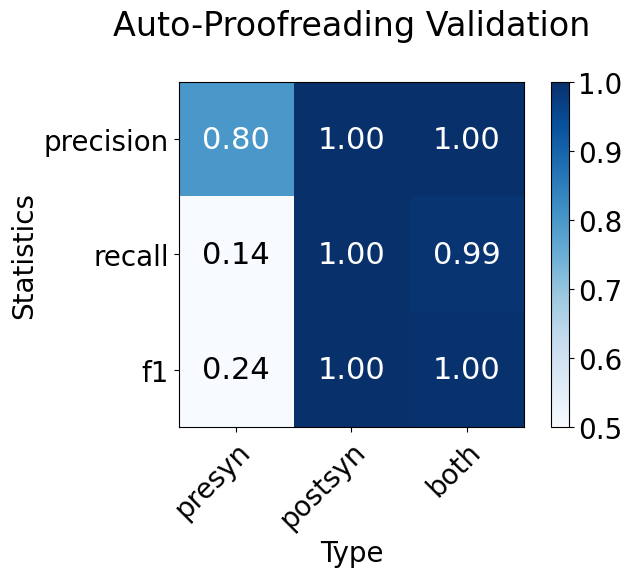

In [108]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [103]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [106]:
branches_at_coord = nru.find_branch_with_specific_coordinate(limb_obj,crossover_coordinates[11])
upstream_branch, downstream_branches = nru.classify_upstream_downsream(limb_obj,
                                   branch_list = branches_at_coord,
                                    verbose = True)

For test node 110, sibling nodes were: [134 170 189 190 191]
overlap = [134 170 189 190 191]
With test node equal to the downstream node
upstream = 175, downstream_nodes = [134 170 189 190 191 110]


In [107]:
import axon_utils as au
au.axon_width(limb_obj[upstream_branch])

310.4782076060238

In [93]:
np.where(np.linalg.norm(crossover_coordinates - crossover_coordinates[12],axis=1)<20000)

(array([11, 12]),)

In [92]:
curr_coordinate = crossover_coordinates[7]
nviz.set_zoom(curr_coordinate,
             radius = 5000)

In [66]:
exactly_equal = False
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinatescurr_coordinate = crossover_coordinates[]
nviz.set_zoom(curr_coordinate,
             radius = 5000)

array([[1253813.37275036, 1054311.12095475, 1018928.10821021],
       [1256945.25646448, 1054256.00841076, 1015177.98894697],
       [1259833.07687104, 1052966.23025988, 1012409.5819424 ],
       [1268494.3221212 , 1050884.06344748, 1034702.20080174],
       [1290864.96500251, 1012087.14361996,  972253.59283704],
       [1297506.1169011 ,  990019.21955557,  954830.28648039],
       [1301359.35608024,  965648.43123698,  936820.1586147 ],
       [1303728.67322506,  863209.46850922,  896645.57702962],
       [1304029.87670019,  936532.20511232,  913958.00336334],
       [1304351.31923867,  945182.07505138,  920575.97105588],
       [1304504.62567556,  920495.56378984,  908286.17992286],
       [1305041.65066392,  885051.00797131,  897793.06605597],
       [1305384.99049238,  886773.02401356,  898741.00270817],
       [1307500.84096217, 1054868.02624231, 1039804.14976241],
       [1310590.58737944, 1054912.37928009, 1040087.57579764],
       [1311479.43843733, 1053836.40192383, 1040777.900

In [62]:
# import neuron_searching as ns
# l_b_dict = ns.query_neuron(neuron_obj,
#                functions_list=["axon_width"],
#                query="axon_width > 140",
#                           limbs_to_process=[neuron_obj.axon_limb_name])
# ret_col  = nviz.visualize_neuron(neuron_obj,
#                      limb_branch_dict=l_b_dict,
#                      mesh_whole_neuron=True,
#                      return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [95]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="axon")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [97]:
curr_coordinate = crossover_coordinates[11]
nviz.set_zoom(curr_coordinate,
             radius = 5000)
nviz.plot_objects(scatters=[curr_coordinate],
                 append_figure=True,
                 show_at_end=False)

# Inspecting the Crossover

In [13]:
neuron_obj

In [14]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [35]:
exactly_equal = False
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

curr_coordinate = crossover_coordinates[3]
nviz.set_zoom(curr_coordinate,
             radius = 5000)

array([[619189.60858089, 909005.11752672, 921858.16539071],
       [622150.46160674, 906032.29381224, 916506.374183  ],
       [659580.21590418, 912086.0525754 , 858423.77709203],
       [660978.7156057 , 915120.04602362, 855183.21397846],
       [723707.35277656, 907290.46068265, 934200.62202314],
       [724767.40149365, 906801.96173937, 936207.40879916],
       [732182.62058889, 905122.91965181, 764268.82583381],
       [737579.02790307, 896878.36911941, 981679.96715529],
       [742759.22651393, 894365.87425227, 990108.9498083 ],
       [744068.39538755, 914384.35822538, 856877.56600516],
       [763641.68979726, 922313.33596652, 837602.43667948],
       [801894.4       , 946952.6       , 805845.8       ],
       [919920.5       , 875178.7       , 835225.3       ],
       [947335.67433163, 851635.06187905, 833828.962783  ]])

In [94]:
import error_detection as ed
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = crossover_coordinates[11],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

For test node 110, sibling nodes were: [134 170 189 190 191]
overlap = [134 170 189 190 191]
With test node equal to the downstream node
upstream = 175, downstream_nodes = [134 170 189 190 191 110]
branches_at_coord = [110 134 170 175 189 190 191]
Number of branches (7) was more than max_degree_to_resolve (6) so returning all downstream as error branches
None [110 134 170 175 189 190 191]


In [10]:
vu.old_to_new_segment_id(seg_id)

864691135462463389

In [11]:
vu.synapse_validation_df_to_category_counts(return_validation_df_revised)

{'presyn': {'TP': 191, 'TN': 0, 'FP': 0, 'FN': 25},
 'postsyn': {'TP': 805, 'TN': 0, 'FP': 7, 'FN': 66}}

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange
